**This notebook demonstrates a Toffoli gate (with flips)**
$$
   \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
   \newcommand{\ket}[1]{\left|{#1}\right\rangle}
   \newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

The IBM User Guide shows a method for implementing a Toffoli gate, based on 
Barenco's [paper](http://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457?cm_mc_uid=43781767191014577577895&cm_mc_sid_50200000=1460741020).

In [1]:
import os, sys
%matplotlib inline
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools
import tools

# Get a backend
IBMQ.load_accounts()
device = backend_tools.get_device(use_sim=True, min_qubits=3)

Initial state: |000>


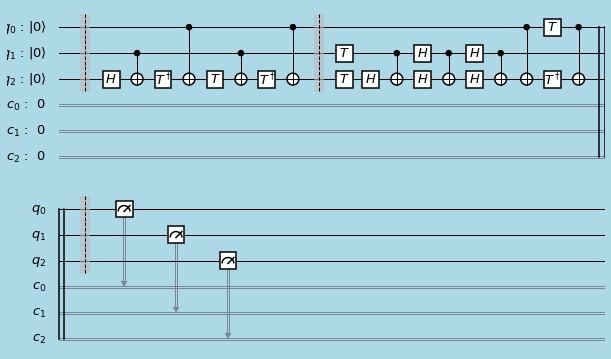

Initial state: |010>


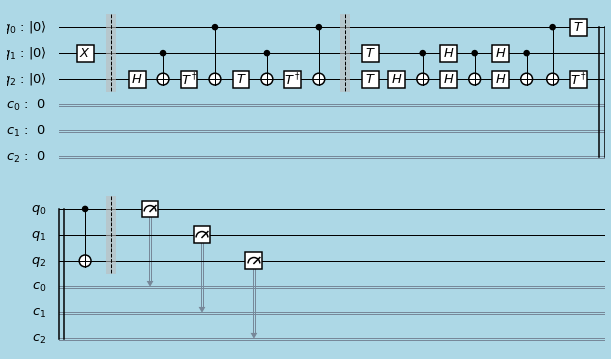

Initial state: |100>


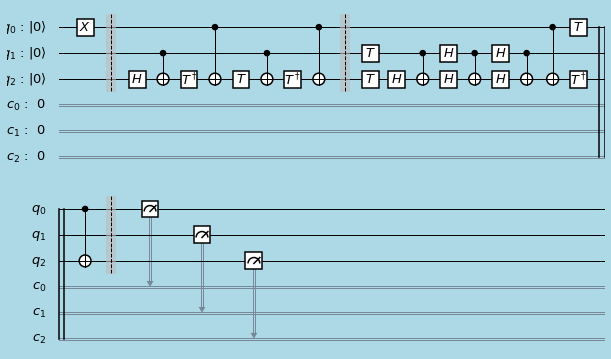

Initial state: |110>


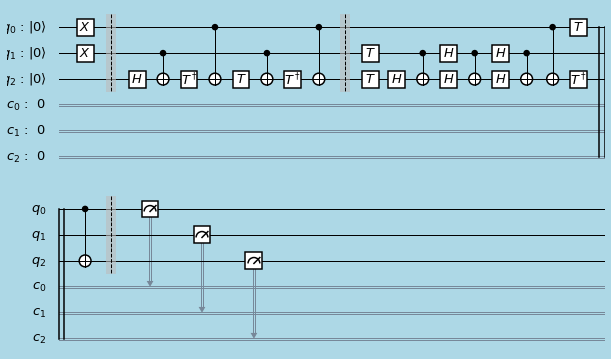

Initial state: |001>


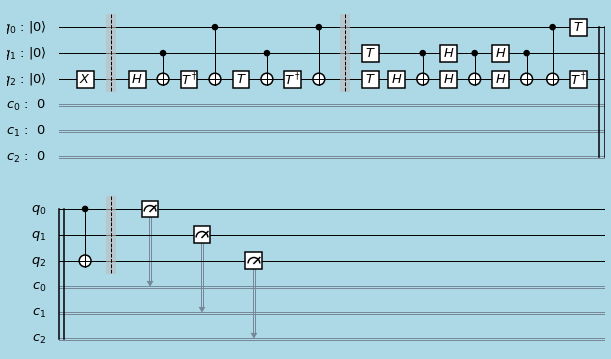

Initial state: |011>


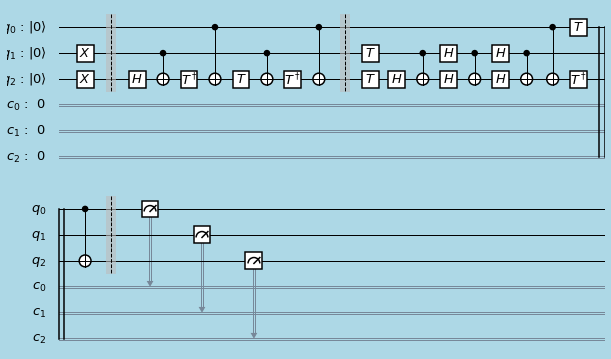

Initial state: |101>


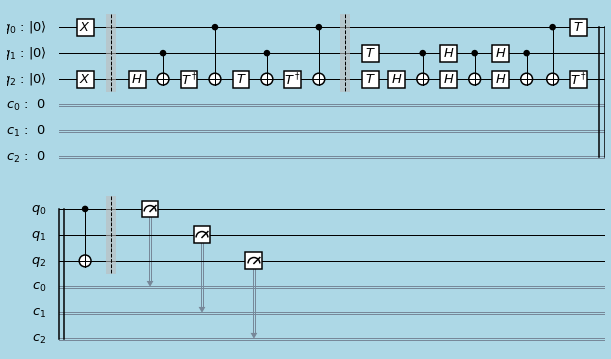

Initial state: |111>


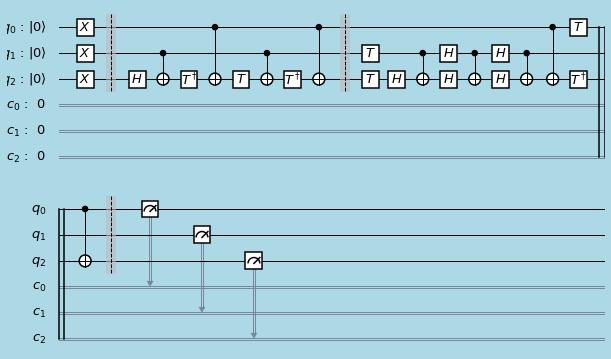

In [2]:
# Define the quantum circuit
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

# Create the Toffoli circuit
toffoli = QuantumCircuit(q, c)
toffoli.barrier()

toffoli.h(q[2])
#toffoli.barrier()

toffoli.cx(q[1], q[2])
#toffoli.barrier()

toffoli.tdg(q[2])
#toffoli.barrier()

toffoli.cx(q[0], q[2])
#toffoli.barrier()

toffoli.t(q[2])
#toffoli.barrier()

toffoli.cx(q[1], q[2])
#toffoli.barrier()

toffoli.tdg(q[2])
#toffoli.barrier()

toffoli.cx(q[0], q[2])
toffoli.barrier()

toffoli.t(q[1])
toffoli.t(q[2])
#toffoli.barrier()

toffoli.h(q[2])
#toffoli.barrier()

# Swap
toffoli.cx(q[1], q[2])
#toffoli.barrier()
toffoli.h(q[1])
toffoli.h(q[2])
#toffoli.barrier()
toffoli.cx(q[1], q[2])
#toffoli.barrier()
toffoli.h(q[1])
toffoli.h(q[2])
#toffoli.barrier()
toffoli.cx(q[1], q[2])
#toffoli.barrier()
# End of swap

toffoli.cx(q[0], q[2])
#toffoli.barrier()

toffoli.t(q[0])
toffoli.tdg(q[2])
#toffoli.barrier()

toffoli.cx(q[0], q[2])
toffoli.barrier()

# Finish off with the measurement along the z-axis
measure = QuantumCircuit(q, c)
measure.measure(q, c)

# Create the initial states
circuits = []
titles = []

# Initial state |000> (not using IBM notation)
initial_state = QuantumCircuit(q, c)
circuits.append(initial_state + toffoli + measure)
titles.append("Initial state: |000>")

# Initial state |010> (not using IBM notation)
initial_state = QuantumCircuit(q, c)
initial_state.x(q[1])
circuits.append(initial_state + toffoli + measure)
titles.append("Initial state: |010>")

# Initial state |100> (not using IBM notation)
initial_state = QuantumCircuit(q, c)
initial_state.x(q[0])
circuits.append(initial_state + toffoli + measure)
titles.append("Initial state: |100>")

# Initial state |110> (not using IBM notation)
initial_state = QuantumCircuit(q, c)
initial_state.x(q[0])
initial_state.x(q[1])
circuits.append(initial_state + toffoli + measure)
titles.append("Initial state: |110>")

# Initial state |001> (not using IBM notation)
initial_state = QuantumCircuit(q, c)
initial_state.x(q[2])
circuits.append(initial_state + toffoli + measure)
titles.append("Initial state: |001>")

# Initial state |011> (not using IBM notation)
initial_state = QuantumCircuit(q, c)
initial_state.x(q[1])
initial_state.x(q[2])
circuits.append(initial_state + toffoli + measure)
titles.append("Initial state: |011>")

# Initial state |101> (not using IBM notation)
initial_state = QuantumCircuit(q, c)
initial_state.x(q[0])
initial_state.x(q[2])
circuits.append(initial_state + toffoli + measure)
titles.append("Initial state: |101>")

# Initial state |111> (not using IBM notation)
initial_state = QuantumCircuit(q, c)
initial_state.x(q[0])
initial_state.x(q[1])
initial_state.x(q[2])
circuits.append(initial_state + toffoli + measure)
titles.append("Initial state: |111>")

# Draw the circuit
style = {'backgroundcolor': 'lightblue'}
circuits[0].draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.7)
for circuit, label in zip(circuits, titles):
    print(label)
    circuit.draw(output="mpl")
    tools.show_figure(circuit.draw(output='mpl', plot_barriers=True, reverse_bits=False, style=style, scale=0.4))

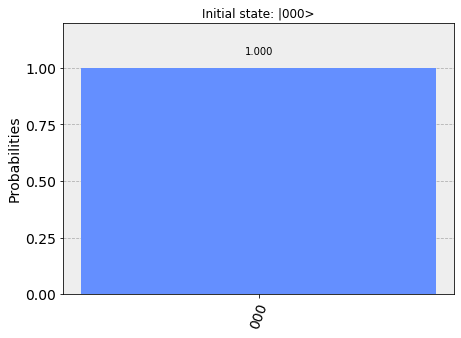

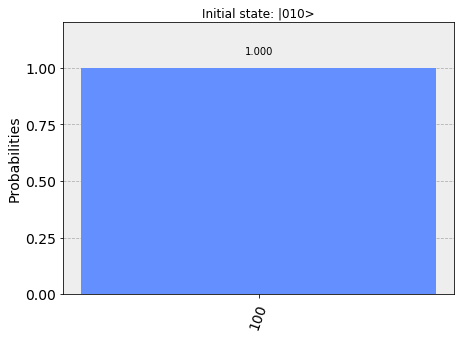

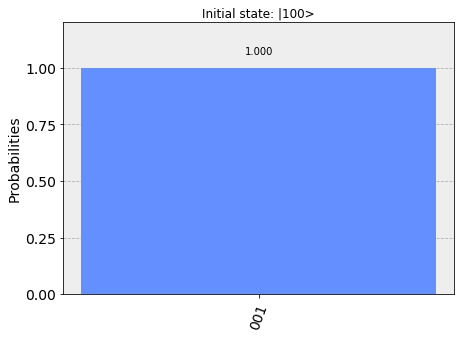

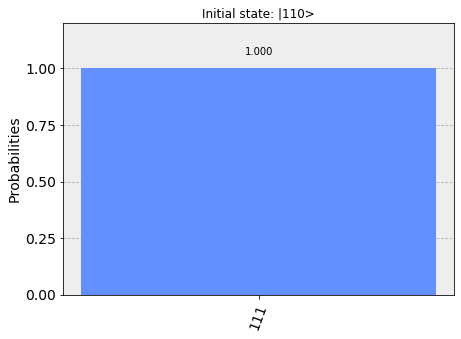

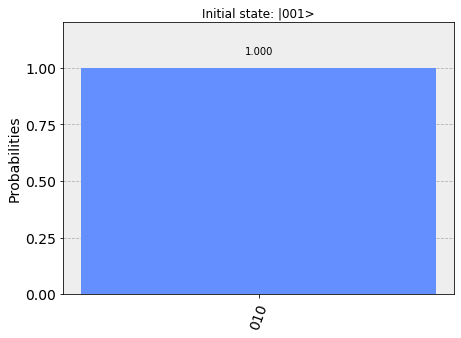

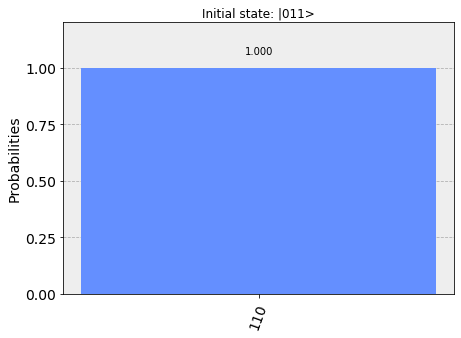

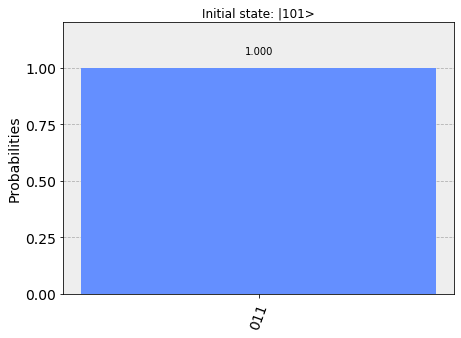

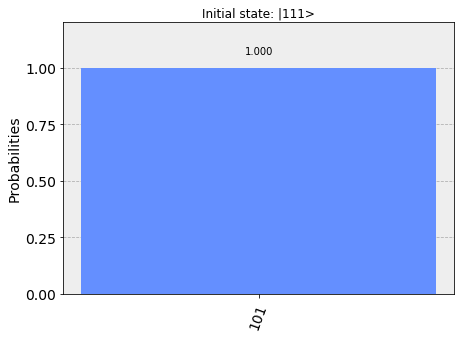

In [4]:
# Simulate or run the circuit
job = execute(circuits, backend=device, shots=512)
result = job.result()

# Plot a histogram of the results
for i in range(len(circuits)):
    counts = result.get_counts(circuits[i])
    tools.show_figure(plot_histogram(counts, title=titles[i]))

Care needs to be taken with the notation:

| Input | Output | Output (bits flipped) | Output (IBM notation) |
|:-----:|:------:|:---------------------:|:---------------------:|
|  000  |   000  |          000          |          000          |
|  010  |   010  |          001          |          100          |
|  100  |   100  |          100          |          001          |
|  110  |   111  |          111          |          111          |
|  001  |   001  |          010          |          010          |
|  011  |   011  |          011          |          110          |
|  101  |   101  |          110          |          011          |
|  111  |   110  |          101          |          101          |

where the input and output use the standard notation $\ket{123...}$ for qubits $1, 2, 3, ...$, whereas the IBM notation is in the reverse order $\ket{...321}$ for qubits $1, 2, 3, ...$